In [1]:
# Import modules
import sys
import os
import pandas as pd

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [3]:
# Append the project root path to sys.path
sys.path.append(os.path.abspath("../scripts"))

In [4]:
# Import Custom Module
import Time_series_forcasting_models as tsfm

In [5]:
# Fetch and preprocess data
train, test = tsfm.fetch_and_preprocess_data('TSLA', '2015-01-01', '2025-01-31')

YF.download() has changed argument auto_adjust default to True



*********************100%***********************]  1 of 1 completed

In [6]:
# Display the first few rows of training data
train.head()

Ticker,TSLA
Date,
2015-01-02,14.620667
2015-01-05,14.006000
2015-01-06,14.085333
2015-01-07,14.063333
2015-01-08,14.041333


In [7]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
result = adfuller(train)

# Extract the p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Interpretation:
if result[1] <= 0.05:
    print("The series is likely stationary (reject the null hypothesis)")
else:
    print("The series is likely non-stationary (fail to reject the null hypothesis)")


ADF Statistic: -1.3071175481635393
p-value: 0.6259097682416385
The series is likely non-stationary (fail to reject the null hypothesis)


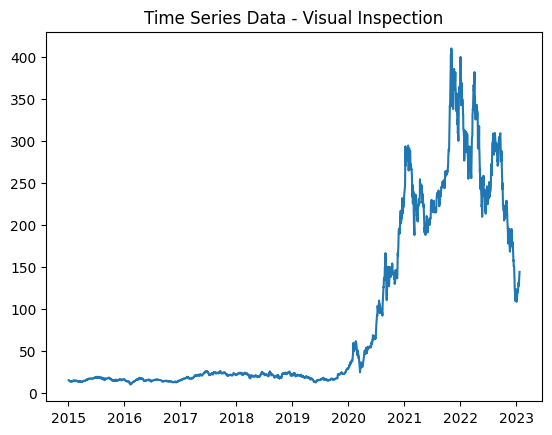

In [8]:
import matplotlib.pyplot as plt

# Plotting the time series data
plt.plot(train)
plt.title('Time Series Data - Visual Inspection')
plt.show()


In [9]:
# Train ARIMA model
arima_forecast, arima_model = tsfm.train_arima_model(train, test)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=12684.802, Time=1.57 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12680.726, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12679.653, Time=0.40 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=12679.753, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12678.997, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=12680.805, Time=1.07 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 3.624 seconds


C:\Users\HP\OneDrive\Desktop\ai2\kaim-week-11\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ARIMA Model Evaluation:
MAE: 89.9096
RMSE: 111.0784
MAPE: 34.61%


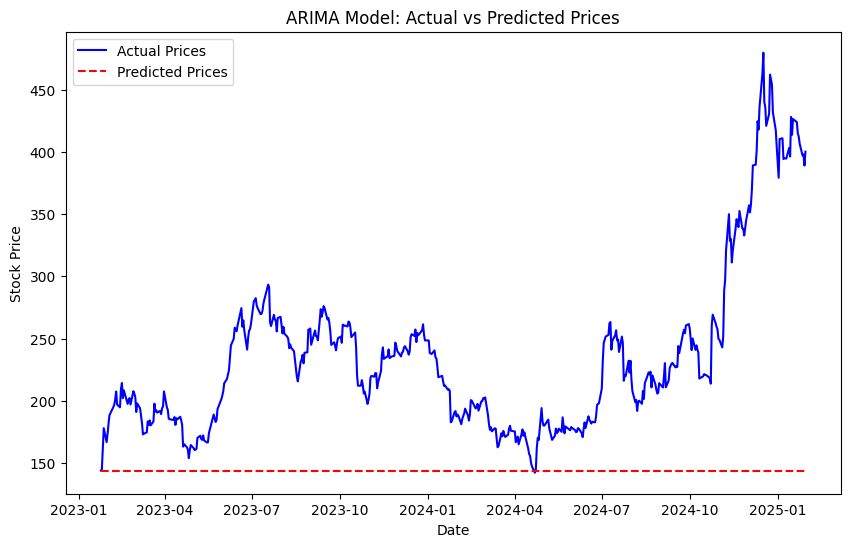

In [10]:
# Evaluate ARIMA model
tsfm.evaluate_model(test, arima_forecast, 'ARIMA')

In [11]:
# Train SARIMA model
sarima_forecast, conf_sarima, sarima_model = tsfm.train_sarima_model(train, test)


SARIMA Model Evaluation:
MAE: 130.1167
RMSE: 151.6919
MAPE: 49.62%


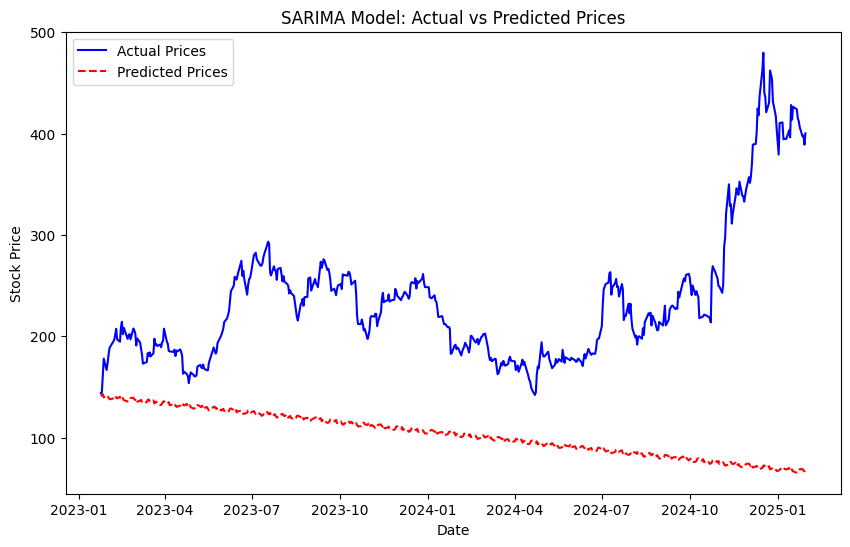

In [12]:
# Evaluate SARIMA model
tsfm.evaluate_model(test, sarima_forecast, 'SARIMA')

In [13]:
# Assume `train` and `test` are pandas Series containing stock prices
ltsm_forecast, lstm_model, data_scaler = tsfm.train_lstm_model(train, test, n_steps=60, epochs=20, batch_size=32)

C:\Users\HP\OneDrive\Desktop\ai2\kaim-week-11\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 15s 81ms/step - loss: 0.0291
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - loss: 0.0020
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - loss: 0.0018
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 0.0016     
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 0.0014    
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0018
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.0015
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0016
Epoch 9/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - loss: 0.0014
Epoch 10/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - loss: 0.0013
Epoch 11/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 101ms/step - loss: 0.0012     
Epoch 12/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 72ms/step - loss: 0.0011
Epoch 13/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 9.4044e-04
Epoch 14/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - loss: 0.0012
Epoch 15/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 71ms/step

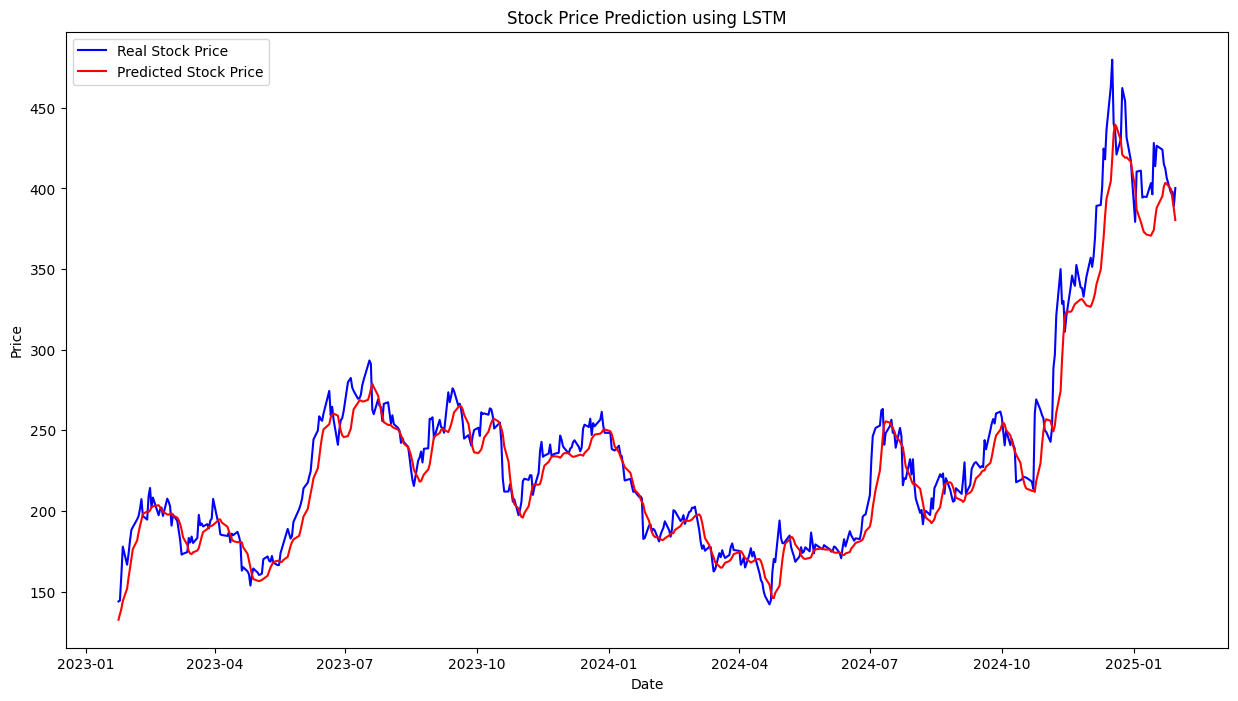

In [15]:
# Plot the results
plt.figure(figsize=(15, 8))
plt.plot(test.index, test.values, color='blue', label='Real Stock Price')  # Real data
plt.plot(test.index, ltsm_forecast, color='red', label='Predicted Stock Price')  # Predicted data
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Ensure ltsm_forecast is a 1D array (Fix the shape issue)
ltsm_forecast = np.array(ltsm_forecast).ravel()  # Convert (507, 1) to (507,)

# Ensure test is also 1D
test = np.array(test).ravel()

# Now you can calculate MAE, RMSE, and MAPE without NaN issues
mae = mean_absolute_error(test, ltsm_forecast)
rmse = np.sqrt(mean_squared_error(test, ltsm_forecast))
mape = np.mean(np.abs((test - ltsm_forecast) / test)) * 100

print(f'LStM Model Evaluation:')
print(f'MAE: {mae:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MAPE: {mape:.2f}%')


NameError: name 'model_name' is not defined